# Required liabraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
d=pd.read_csv("train_ctrUa4K.csv") #training data

d=d.drop('Loan_ID',axis=1) #as id column is not required to train a model
d

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# Variable identification

In [3]:
d.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

# Missing values treatment

In [4]:
d.describe() #it will show the details of all continous variables

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
d.isnull().sum()  #checking for null values

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
#fill categorical values

print(d.Gender.value_counts())
d.Gender.fillna('Male',inplace=True) #as the frequency of Male class higher than Female so we can fill the Male class where null value is present 
print(d.Gender.value_counts())


print(d.Married.value_counts())  #as highest number of frequency is belong to Yes category so we can fill the null values with 'yes'
d.Married.fillna('Yes',inplace=True)
print(d.Married.value_counts()) 

print(d.Self_Employed.value_counts()) 
d.Self_Employed.fillna('No',inplace=True)
print(d.Self_Employed.value_counts()) 

print(d.Dependents.value_counts())
d.Dependents.fillna('0',inplace=True)
d.loc[(d['Dependents'] == '3+'),'Dependents']=3   #as +3 will not take as 3 for the model so i replaced all the +3 values to 1     
print(d.Dependents.value_counts())


print(d.Credit_History.value_counts())
d.Credit_History.fillna(1.0,inplace=True) #although this variable is continous in nature as it has numeric values but it is a categorical because it has only two class
print(d.Credit_History.value_counts())

Male      489
Female    112
Name: Gender, dtype: int64
Male      502
Female    112
Name: Gender, dtype: int64
Yes    398
No     213
Name: Married, dtype: int64
Yes    401
No     213
Name: Married, dtype: int64
No     500
Yes     82
Name: Self_Employed, dtype: int64
No     532
Yes     82
Name: Self_Employed, dtype: int64
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64
1.0    475
0.0     89
Name: Credit_History, dtype: int64
1.0    525
0.0     89
Name: Credit_History, dtype: int64


In [7]:
#fill the nemeric values
d.LoanAmount.fillna(d.LoanAmount.median(),inplace=True)

d.Loan_Amount_Term.fillna(d.Loan_Amount_Term.median(),inplace=True)

In [8]:
d.isnull().sum()  #as you can see here now there is no missing values in our dataset

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Encoding categorical values

In [9]:
#as machine learning model cannot under stand string as it's input so all categorical values need to convert into numeric value

enc=LabelEncoder()
d['Gender']=enc.fit_transform(d['Gender'])
d['Married']=enc.fit_transform(d['Married'])
d['Education']=enc.fit_transform(d['Education'])
d['Self_Employed']=enc.fit_transform(d['Self_Employed'])
d['Property_Area']=enc.fit_transform(d['Property_Area'])
d['Loan_Status']=enc.fit_transform(d['Loan_Status']) #target var

# Outliers Treatment

In [10]:
d.describe()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.218241,0.133550,5403.459283,1621.245798,145.752443,342.410423,0.855049,1.037459,0.687296
std,0.386497,0.476373,0.413389,0.340446,6109.041673,2926.248369,84.107233,64.428629,0.352339,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,3812.500000,1188.500000,128.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,0.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


# Distribution for continuous variable

In [11]:
#we can merge two feature that is applicant income and coapplicant income then set them into total income
d['Total_income']=d['ApplicantIncome']+d['CoapplicantIncome']
d.drop(['ApplicantIncome','CoapplicantIncome'],axis=1,inplace=True)

<AxesSubplot:>

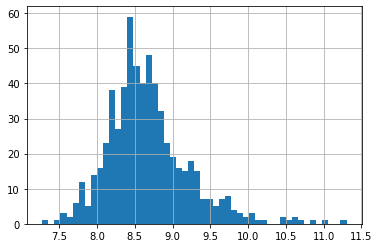

In [12]:
#now check distribution of total_income
d['Total_income']=np.log(d['Total_income']) #as u can see i did log tranformation for normal distrbution of data
d['Total_income'].hist(bins=50)

<AxesSubplot:>

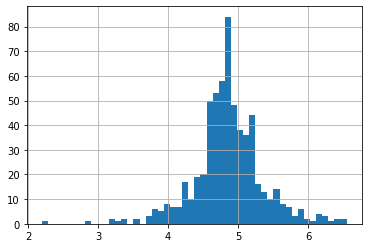

In [13]:
d.LoanAmount=np.log(d.LoanAmount) #similar thing log transformation i did for all continuous features if they have not noramlly distributed
d.LoanAmount.hist(bins=50)

<AxesSubplot:>

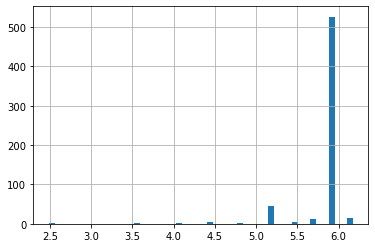

In [14]:
d.Loan_Amount_Term=np.log(d.Loan_Amount_Term)
d.Loan_Amount_Term.hist(bins=50)

In [15]:
d
#overview of your dataset

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_income
0,1,0,0,0,0,4.852030,5.886104,1.0,2,1,8.674026
1,1,1,1,0,0,4.852030,5.886104,1.0,0,0,8.714568
2,1,1,0,0,1,4.189655,5.886104,1.0,2,1,8.006368
3,1,1,0,1,0,4.787492,5.886104,1.0,2,1,8.505323
4,1,0,0,0,0,4.948760,5.886104,1.0,2,1,8.699515
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,4.262680,5.886104,1.0,0,1,7.972466
610,1,1,3,0,0,3.688879,5.192957,1.0,0,1,8.320205
611,1,1,1,0,0,5.533389,5.886104,1.0,2,1,9.025456
612,1,1,2,0,0,5.231109,5.886104,1.0,2,1,8.933664


# Splitting the dataset

In [16]:
x=d.drop('Loan_Status',axis=1)
y=d['Loan_Status']

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.30)

In [17]:
from sklearn.preprocessing import StandardScaler
scl=StandardScaler()
x_train_sc=scl.fit_transform(x_train)
x_test_sc=scl.fit_transform(x_test)

In [18]:
x

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_income
0,1,0,0,0,0,4.852030,5.886104,1.0,2,8.674026
1,1,1,1,0,0,4.852030,5.886104,1.0,0,8.714568
2,1,1,0,0,1,4.189655,5.886104,1.0,2,8.006368
3,1,1,0,1,0,4.787492,5.886104,1.0,2,8.505323
4,1,0,0,0,0,4.948760,5.886104,1.0,2,8.699515
...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,4.262680,5.886104,1.0,0,7.972466
610,1,1,3,0,0,3.688879,5.192957,1.0,0,8.320205
611,1,1,1,0,0,5.533389,5.886104,1.0,2,9.025456
612,1,1,2,0,0,5.231109,5.886104,1.0,2,8.933664


In [19]:
from sklearn.linear_model import LogisticRegression
clf1=LogisticRegression().fit(x_train,y_train)
y_pred=clf1.predict(x_test)
accuracy_score(y_test,y_pred)

0.827027027027027

In [20]:
from sklearn.neighbors import KNeighborsClassifier
clf2=KNeighborsClassifier().fit(x_train_sc,y_train)
y_pred2=clf2.predict(x_test_sc)
accuracy_score(y_pred2,y_test)

0.8

In [21]:
from sklearn.tree import DecisionTreeClassifier
clf3=DecisionTreeClassifier().fit(x_train,y_train)
y_pred3=clf3.predict(x_test)
accuracy_score(y_pred3,y_test)

0.7351351351351352

In [22]:
from sklearn.svm import SVC
clf4=SVC().fit(x_train,y_train)
y_pred4=clf4.predict(x_test)
accuracy_score(y_pred4,y_test)

0.827027027027027

In [23]:
from sklearn.ensemble import RandomForestClassifier
clf5=RandomForestClassifier().fit(x_train,y_train)
y_pred5=clf5.predict(x_test)
accuracy_score(y_pred5,y_test)

0.7945945945945946

In [24]:
x

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_income
0,1,0,0,0,0,4.852030,5.886104,1.0,2,8.674026
1,1,1,1,0,0,4.852030,5.886104,1.0,0,8.714568
2,1,1,0,0,1,4.189655,5.886104,1.0,2,8.006368
3,1,1,0,1,0,4.787492,5.886104,1.0,2,8.505323
4,1,0,0,0,0,4.948760,5.886104,1.0,2,8.699515
...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,4.262680,5.886104,1.0,0,7.972466
610,1,1,3,0,0,3.688879,5.192957,1.0,0,8.320205
611,1,1,1,0,0,5.533389,5.886104,1.0,2,9.025456
612,1,1,2,0,0,5.231109,5.886104,1.0,2,8.933664


# test the model with new test data

In [25]:
d2=pd.read_csv("test_lAUu6dG.csv")
index_final=d2['Loan_ID']
d2

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [26]:
d2.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [27]:
d2.isnull().sum() 

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [28]:
#filling missing values for new test data

d2.Gender.fillna('Male',inplace=True) #as the frequency of Male class higher than Female so we can fill the Male class where null value is present 
print(d2.Gender.value_counts())

d2.Dependents.fillna('0',inplace=True)
d2.loc[(d2['Dependents'] == '3+'),'Dependents']=3  
print(d2.Dependents.value_counts())

#print(d2.Self_Employed.value_counts()) 
d2.Self_Employed.fillna('No',inplace=True)
print(d2.Self_Employed.value_counts()) 


d2.LoanAmount.fillna(d2.LoanAmount.mean(),inplace=True)
d2.Loan_Amount_Term.fillna(d2.Loan_Amount_Term.mean(),inplace=True)


#print(d2.Credit_History.value_counts())
d2.Credit_History.fillna(1.0,inplace=True) #although this variable is continous in nature as it has numeric values but it is a categorical because it has only two class
print(d2.Credit_History.value_counts())





#catergorical encoding for new test data
d2['Gender']=enc.fit_transform(d2['Gender'])
d2['Married']=enc.fit_transform(d2['Married'])
d2['Education']=enc.fit_transform(d2['Education'])
d2['Self_Employed']=enc.fit_transform(d2['Self_Employed'])
d2['Property_Area']=enc.fit_transform(d2['Property_Area'])

Male      297
Female     70
Name: Gender, dtype: int64
0    210
2     59
1     58
3     40
Name: Dependents, dtype: int64
No     330
Yes     37
Name: Self_Employed, dtype: int64
1.0    308
0.0     59
Name: Credit_History, dtype: int64


In [29]:
d2.describe()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,0.809264,0.634877,0.228883,0.100817,4805.599455,1569.577657,136.132597,342.537396,0.839237,1.079019
std,0.393417,0.482122,0.420687,0.301498,4910.685399,2334.232099,60.946040,64.620366,0.367814,0.824337
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28.000000,6.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,2864.000000,0.000000,101.000000,360.000000,1.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,3786.000000,1025.000000,126.000000,360.000000,1.000000,1.000000
75%,1.000000,1.000000,0.000000,0.000000,5060.000000,2430.500000,157.500000,360.000000,1.000000,2.000000
max,1.000000,1.000000,1.000000,1.000000,72529.000000,24000.000000,550.000000,480.000000,1.000000,2.000000


<AxesSubplot:>

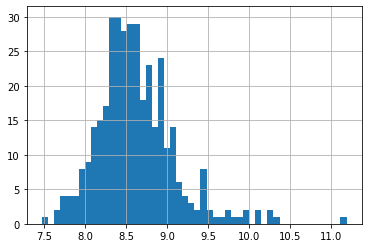

In [30]:
#we can merge two feature that is applicant income and coapplicant income then set them into total income
d2['Total_income']=d2['ApplicantIncome']+d2['CoapplicantIncome']
d2.drop(['ApplicantIncome','CoapplicantIncome'],axis=1,inplace=True)

#now check distribution of total_income
d2['Total_income']=np.log(d2['Total_income']) #as u can see i did log tranformation for normal distrbution of data
d2['Total_income'].hist(bins=50)

<AxesSubplot:>

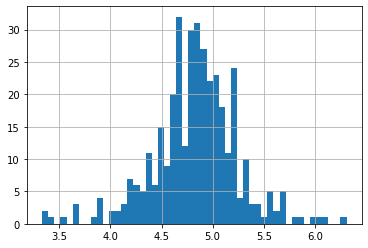

In [31]:
d2.LoanAmount=np.log(d2.LoanAmount) #similar thing log transformation i did for all continuous features if they have not noramlly distributed
d2.LoanAmount.hist(bins=50)

<AxesSubplot:>

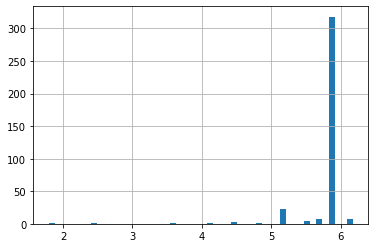

In [32]:
d2.Loan_Amount_Term=np.log(d2.Loan_Amount_Term)
d2.Loan_Amount_Term.hist(bins=50)

In [33]:
d2

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_income
0,LP001015,1,1,0,0,0,4.700480,5.886104,1.0,2,8.651724
1,LP001022,1,1,1,0,0,4.836282,5.886104,1.0,2,8.428581
2,LP001031,1,1,2,0,0,5.337538,5.886104,1.0,2,8.824678
3,LP001035,1,1,2,0,0,4.605170,5.886104,1.0,2,8.494129
4,LP001051,1,0,0,1,0,4.356709,5.886104,1.0,2,8.094378
...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,1,1,3,1,1,4.727388,5.886104,1.0,2,8.663196
363,LP002975,1,1,0,0,0,4.744932,5.886104,1.0,2,8.490233
364,LP002980,1,0,0,0,0,4.836282,5.886104,1.0,1,8.564649
365,LP002986,1,1,0,0,0,5.062595,5.886104,1.0,0,8.908289


# Prediction

In [34]:
new_test=d2.drop('Loan_ID',axis=1)
new_pred=clf1.predict(new_test)

d3=pd.DataFrame()
d3['Loan_ID']=d2.Loan_ID
d3['Loan_Status']=new_pred
d3

,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,1
...,...,...
362,LP002971,1
363,LP002975,1
364,LP002980,1
365,LP002986,1


In [35]:
len(new_test)

367

In [36]:
d3.describe()

,Loan_Status
count,367.000000
mean,0.839237
std,0.367814
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1.000000


In [37]:
d3.loc[d3['Loan_Status']==1,'Loan_Status']='Y'
d3.loc[d3['Loan_Status']==0,'Loan_Status']='N'

In [38]:
d3.to_csv('Solution.csv', index= False)

In [39]:
len(y_pred)

185

In [40]:
d3

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y
